In [1]:
## Classifications

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Softmax, Linear, Relu, Sigmoid, Tanh
from gympy.networks import NeuralNetwork
from gympy.optimizers import GradientDescent
from gympy.loss import CategoricalCrossEntropy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

<AxesSubplot:xlabel='f1', ylabel='f2'>

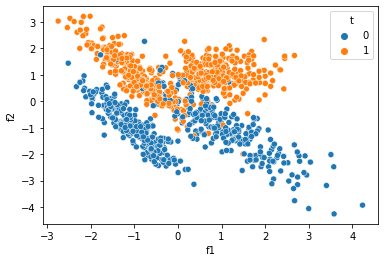

In [3]:

x, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    random_state=21075
)
df = pd.DataFrame(x, columns=['f1','f2'])
df['t'] = y
sns.scatterplot(data=df, x='f1',y='f2', hue='t')

In [4]:
model = NeuralNetwork(
    layers = [
        Tanh(n_input=2, n_output=2, dropout_rate=0.5),
        Softmax(n_input=2, n_output=2)
    ],
    optimizer = GradientDescent(learning_rate=3e-2),
    loss = CategoricalCrossEntropy(),
)

In [5]:
model

NeuralNetwork(layers=[Tanh(n_input=2, n_output=2, weights=array([[-0.00137792,  0.00654241],
       [-0.00586493, -0.007284  ]]), bias=array([[-0.01388629],
       [-0.00234669]]), x=None, z=None, dz=None, grads_dw=None, grads_db=None, dropout_rate=0.5, dropout_cache=None, type=<LayersEnum.tanh: 'tanh'>), Softmax(n_input=2, n_output=2, weights=array([[-0.00037792, -0.01165808],
       [-0.00623989,  0.01276791]]), bias=array([[0.00930415],
       [0.00057411]]), x=None, z=None, dz=None, grads_dw=None, grads_db=None, dropout_rate=0, dropout_cache=None, type=<LayersEnum.softmax: 'softmax'>)], cache=None, optimizer=GradientDescent(learning_rate=0.03, learning_rate_decay=0), loss=<gympy.loss.loss.CategoricalCrossEntropy object at 0x7feecc487760>, cost=None, batch_size=None, seed=None, lambd=0.0)

In [6]:
X = x.T

Y = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1, 1)).T
Y 

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.]])

In [7]:
tt = model.forward(X[:,0:1000])
CategoricalCrossEntropy()(tt, Y[:,0:1000])

0.69320290904026

In [8]:
df

,f1,f2,t
0,0.533223,-0.121854,0
1,-1.289926,1.799223,1
2,-1.418819,1.325952,1
3,-0.610507,-1.372351,0
4,-2.115243,2.555191,1
...,...,...,...
995,-0.398373,-1.507981,0
996,1.085065,-0.474352,0
997,0.807242,0.791003,1
998,-0.817937,1.702081,1


<AxesSubplot:xlabel='f1', ylabel='f2'>

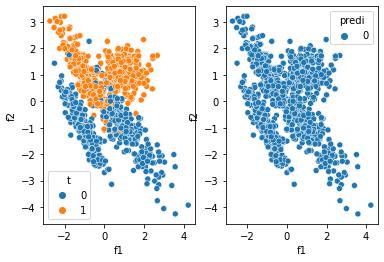

In [9]:

probi = model.forward(X)
pred = np.argmax(probi, axis=0)
df['predi'] = pred

fig, ax = plt.subplots(1,2)

sns.scatterplot(data=df, x='f1',y='f2', hue='t', ax=ax[0])
sns.scatterplot(data=df, x='f1',y='f2', hue='predi', ax=ax[1])

In [10]:
model.train(X, Y,n_iter=500, show=50)

0 cost 0.6933779045538074
50 cost 0.6929304621087938
100 cost 0.6931460833769069
150 cost 0.6915361720772648
200 cost 0.6931451805923323
250 cost 0.5276161000777426
300 cost 0.6931459062835991
350 cost 0.3010795799141789
400 cost 0.4124134587426702
450 cost 0.308507682866147


In [11]:
prob = model.forward(X)
print(prob.shape)
pred = np.argmax(prob, axis=0)

df['pred'] = pred
df.head()

(2, 1000)


,f1,f2,t,predi,pred
0,0.533223,-0.121854,0,0,0
1,-1.289926,1.799223,1,0,1
2,-1.418819,1.325952,1,0,1
3,-0.610507,-1.372351,0,0,0
4,-2.115243,2.555191,1,0,1


<AxesSubplot:xlabel='f1', ylabel='f2'>

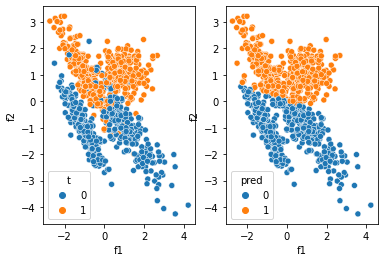

In [12]:
fig, ax = plt.subplots(1,2)

sns.scatterplot(data=df, x='f1',y='f2', hue='t', ax=ax[0])
sns.scatterplot(data=df, x='f1',y='f2', hue='pred', ax=ax[1])

In [13]:
dp = model.layers[0].dropout_array()
print(dp.shape)
print(dp)

(2, 1)
[[2.]
 [0.]]


In [14]:
model.layers[0].grads_dw * dp

array([[-0.05667081,  0.03532565],
       [-0.        ,  0.        ]])